<a href="https://colab.research.google.com/github/SasikaA073/AISP-Com-Photo-forks/blob/main/Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Get Images
## 4. Regenerate images
## 5. Increase accuracy

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sasikaamarasinghe","key":"313467d6b9c455f35c4429f61d7130c0"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36            842        100  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56           1285        103  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT Proper Train Dataset                         119MB  2023-11-05 14:03:25           1270        119  1.0              
muhammadbinimran/housing-price-prediction-data                 Housing

In [6]:
!kaggle datasets download -d arnaud58/landscape-pictures

 98% 606M/620M [00:08<00:00, 141MB/s]
100% 620M/620M [00:08<00:00, 77.7MB/s]


In [8]:
! unzip landscape-pictures.zip -d landscape_pictures

Archive:  landscape-pictures.zip
  inflating: landscape_pictures/00000000.jpg  
  inflating: landscape_pictures/00000000_(2).jpg  
  inflating: landscape_pictures/00000000_(3).jpg  
  inflating: landscape_pictures/00000000_(4).jpg  
  inflating: landscape_pictures/00000000_(5).jpg  
  inflating: landscape_pictures/00000000_(6).jpg  
  inflating: landscape_pictures/00000000_(7).jpg  
  inflating: landscape_pictures/00000001.jpg  
  inflating: landscape_pictures/00000001_(2).jpg  
  inflating: landscape_pictures/00000001_(3).jpg  
  inflating: landscape_pictures/00000001_(4).jpg  
  inflating: landscape_pictures/00000001_(5).jpg  
  inflating: landscape_pictures/00000001_(6).jpg  
  inflating: landscape_pictures/00000001_(7).jpg  
  inflating: landscape_pictures/00000002.jpg  
  inflating: landscape_pictures/00000002_(2).jpg  
  inflating: landscape_pictures/00000002_(3).jpg  
  inflating: landscape_pictures/00000002_(4).jpg  
  inflating: landscape_pictures/00000002_(5).jpg  
  inflatin

In [10]:
!rm -r landscape-pictures.zip

In [11]:
!mkdir noisy_images

## 2. Add noise

In [26]:
from PIL import Image
import numpy as np
import os
import random

In [29]:
# Define the path
directory_path = "/content/landscape_pictures"

# Get the list of files in the directory
files = os.listdir(directory_path)


In [60]:
save_path = "/content/noisy_images"

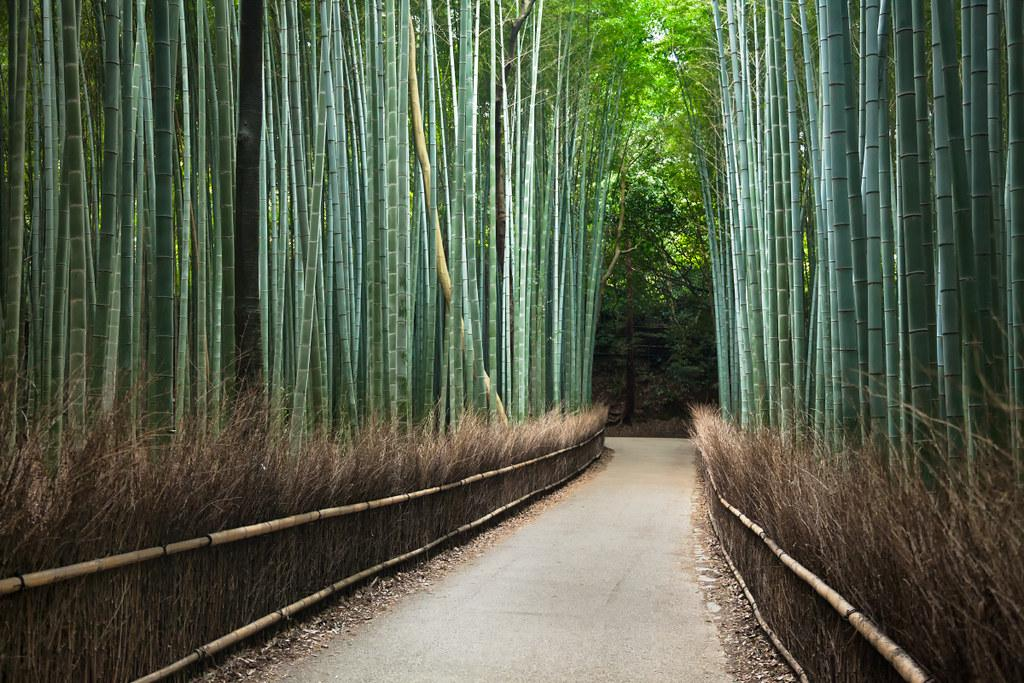

In [37]:
# Select a random file
random_file = random.choice(files)

# Construct the full path to the random file
random_file_path = os.path.join(directory_path, random_file)

# Open the random image using PIL
random_image = Image.open(random_file_path)

# Display the random image
random_image

There are 4319 images in the dataset.

In [33]:
len(files)

4319

In [68]:

# Open an image using PIL
image = random_image # Replace with your image path


# Function to add random noise to the image
def add_noise(image_array, noise_factor=0.1):
    # Generate random noise with the same shape as the image
    noise = np.random.normal(0, noise_factor, image_array.shape)
    noisy_image = image_array + noise
    # Clip pixel values to stay within the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)  # Convert back to uint8

# Function to return the noisy image
def get_noisy_image(file_name, noise_factor = 10, save_path=save_path):

  file_path = os.path.join(directory_path, file_name)
  img = Image.open(file_path)
  img = img.convert('RGB')  # Convert to RGB if needed

  # Convert image to NumPy array
  img_array = np.array(image)

  # Add noise to the image
  noisy_img_array = add_noise(img_array, noise_factor=5)  # Adjust noise factor as needed

  # Convert NumPy array back to PIL image
  noisy_image = Image.fromarray(noisy_img_array)

  # Display or save the noisy image
  # noisy_image.save('path_to_save_noisy_image.jpg')

  noisy_image.save( os.path.join(save_path, "noisy_" + file_name))
  return noisy_image

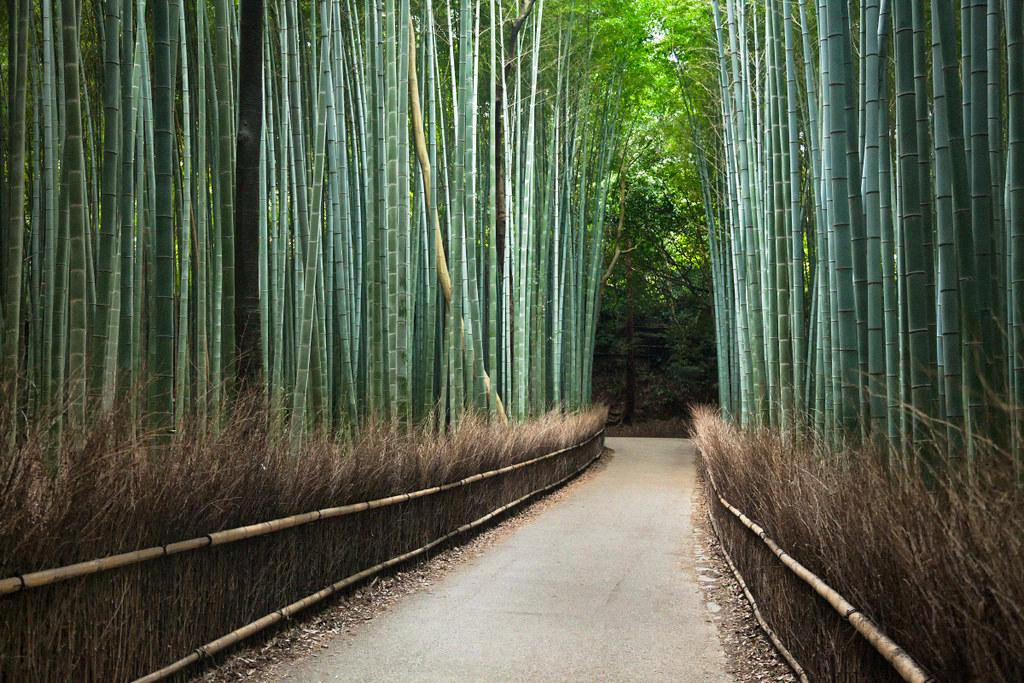

In [69]:
noisy_img1 = get_noisy_image(files[1], noise_factor = 10)
noisy_img1

In [71]:
# Iterate over files
for file in files:
  get_noisy_image(file, noise_factor = random.uniform(0.1, 1000))

Calculate MSE for sample images

In [43]:
import numpy as np

def mse(image1, image2):
    # Convert images to NumPy arrays (ensure they have the same shape)
    img1_array = np.array(image1)
    img2_array = np.array(image2)

    # Ensure both images have the same shape
    if img1_array.shape != img2_array.shape:
        raise ValueError("Images must have the same dimensions.")

    # Calculate Mean Squared Error
    mse_value = np.mean((img1_array - img2_array) ** 2)
    return mse_value

# Usage example:
# Assuming you have two PIL images 'image1' and 'image2'
# mse_value = mse(image1, image2)
# print(f"MSE between the images: {mse_value}")


In [44]:
mse(image, image)

0.0

In [50]:
mse(image, noisy_img1)

24.687385138329674

In [51]:
mse(image, noisy_img2)

24.72000966553807

## Opencv Implementation

In [54]:
import cv2

In [59]:
# Load the image
image = cv2.imread(random_file_path)

In [58]:
# Generate random Gaussian noise
mean = 0
stddev = 180
noise = np.zeros(image.shape, np.uint8)
cv2.randn(noise, mean, stddev)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [171,   0,   0],
        [255,   0,   0],
        [  0,   0,   0]],

       [[111,   0,   0],
        [166,   0,   0],
        [ 48,   0,   0],
        ...,
        [ 88,   0,   0],
        [172,   0,   0],
        [200,   0,   0]],

       [[153,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [127,   0,   0],
        [  0,   0,   0]],

       ...,

       [[164,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [162,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [143,   0,   0],
        [ 87,   0,   0],
        ...,
        [  0,   0,   0],
        [221,   0,   0],
        [255,   0,   0]],

       [[173,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 26,   0,   0],
        [  0,   0,   0],
        [ 63,   0,   0]]

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread()



# Add noise to image
noisy_img = cv2.add(img, noise)

# Save noisy image
cv2.imwrite('noisy_img.jpg', noisy_img)

## 3. Feed noisy images into autoencoder